# COGS 108 - Final Project 

# Overview

*Fill in your overview here*

# Names

- Diana Chong
- Skylar Hom
- Tricia Pham
- Sofia Sanchez
- Emily Tam

# Group Members IDs

- A14627769
- A13022643
- A14107552
- A92130382
- A14873136

# Research Question

Are mobile iOS application prices correlated with user ratings?

## Background and Prior Work

Mobile technology has revolutionized how much of the world functions. It has the fastest growth of any technology in history (West, 2015). The speed of information that can be transferred across the globe has astronomically increased. Furthermore, the use of mobile technology has changed the relationship between businesses and consumers (West, 2015). The market for mobile devices, such as smartphones and tablets, has grown in tandem. A study conducted by the Pew Research Center concluded that around 90% of Americans currently have some form of mobile device (West, 2015). One primary component of mobile devices are the applications that are on the phone. They appear as bubble icons on the device’s display that are loaded by tapping on them. Application use is the primary way that users interact with their phones. A few applications are preloaded onto the phone. However, a significant number of applications must be downloaded from a host. For Apple phones, the Apple Store supplies nearly all of the applications that users can choose to download.

Upon the opening of the Apple Store, an “app economy” bloomed. The app economy is the development, marketing, and consumption of mobile applications (Dyer-Witheford, 2014). A significant portion of the software development field is dedicated towards the creation and maintenance of mobile applications (Dyer-Witheford, 2014). Due to the sheer scale of mobile applications, it is crucial for both companies and consumers to understand current trends in the app market. There is a huge spread of variability within the application market -- the type of application, such as social apps, games, or services; the price of the application; the company behind the development of the application; and the services that the application provides. Also, there are demographic trends for users of certain apps, such as age and gender, and statistical trends for products, like user ratings.  

On the company's end, the pricing of apps is mainly driven by a desired end result. Whether a group is striving for user numbers or aiming to make large profits determines if an application is free or paid. However, these desired goals are balanced by what customers are willing to pay for the product which is influenced by perceived quality and level of necessity. If customer reviews are in favor of the product and listed features align with user needs, people are more likely to see it as worthwhile. Since there are an abundant number of free iOS apps, choosing to not make an application free automatically raises the users’ expectations that what they are paying for will be worth the extra dollars that another product may not be asking for. It is up to a company to ensure their app fulfills expectations which goes on to affect if an individual is willing to pay for something they have not been able to even use yet.

User ratings are quite subjective and they encompass a variety of user profiles that conjunctively measure if the quality of a product is worth its monetary value. Ratings can be generally higher for paid apps as customers believe they are getting more and quality matches up to a price point. However, ratings can also be lower as high expectations can exceed what the app provides. General trends of iOS app ratings in relation to prices are largely influenced by the level of uncertainty users have when searching for a tool (Song, Kim, Jones, Baker, & Chin, 2014). This uncertainty, ranging from knowing exactly what is expected from the company’s products to needing an application as a first resource, influences expectations and demands which is reflected upon user app ratings. 




References (include links):
- 1) Dyer-Witheford, N. (2014). App Worker. In Miller P. & Matviyenko S. (Eds.), The Imaginary App (pp. 127-142). 
MIT Press. Retrieved from http://www.jstor.org/stable/j.ctt9qf91w.16
- 2) Song, J., Kim, J., Jones, D. R., Baker, J., Chin, W. W. (2014). Application discoverability and user satisfaction in mobile application stores: An environmental psychology perspective. Elsevier, 59, 37-51. Doi: https://doi.org/10.1016/j.dss.2013.10.004
- 3)West, D. (2015). MOBILE TECHNOLOGY. In Going Mobile: How Wireless Technology is Reshaping Our Lives 
(pp. 1-15). Brookings Institution Press. Retrieved from http://www.jstor.org/stable/10.7864/j.ctt7zsvqt.4


# Hypothesis


Null Hypothesis: The sample distribution of iOS app prices and user ratings are equal.

Alternative Hypothesis: The sample distribution of iOS app prices and user ratings are different. 

# Dataset(s)

Mobile App Statistics (Apple iOS app store) dataset
https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps#appleStore_description.csv
(7197 observations, 16 variables)

To analyze statistics about Apple iOS applications, we are utilizing the dataset “Mobile App Statistics (Apple iOS app store)” from Kaggle. The dataset provides data regarding variables such as ratings, prices and genres of 7197 different apps. For such variables, user rating is measured on a 0-5-point scale, prices are in US dollars, and some genres include Games, Health & Fitness and Utilities. 


(Copy this information for each dataset)
- Dataset Name:
- Link to the dataset:
- Number of observations:

1-2 sentences describing each dataset. 

If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets.

# Setup

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="white", font_scale=2)

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
#Read in app data
df = pd.read_csv('AppleStore.csv')

#Read in app description data
df_desc = pd.read_csv('appleStore_description.csv')

In [3]:
#Check what data looks like
df.head()

#df_desc.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


# Data Cleaning

Describe your data cleaning steps here.

In [4]:
#Check columns
df.columns

Index(['Unnamed: 0', 'id', 'track_name', 'size_bytes', 'currency', 'price',
       'rating_count_tot', 'rating_count_ver', 'user_rating',
       'user_rating_ver', 'ver', 'cont_rating', 'prime_genre',
       'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic'],
      dtype='object')

In [5]:
#Remove unneeded columns
df = df.drop(columns = ['Unnamed: 0', 'id', 'size_bytes', 'currency', 'rating_count_ver', 'user_rating_ver', 'ver',
                  'cont_rating', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic'], axis = 1)
df

#Explanation:
#Unnamed: 0 is the dataset's original index that has not been removed. No data is stored here.
#Currency is all in USD, so this information is unnecessary. 

,track_name,price,rating_count_tot,user_rating,prime_genre
0,PAC-MAN Premium,3.99,21292,4.0,Games
1,Evernote - stay organized,0.00,161065,4.0,Productivity
2,"WeatherBug - Local Weather, Radar, Maps, Alerts",0.00,188583,3.5,Weather
3,"eBay: Best App to Buy, Sell, Save! Online Shop...",0.00,262241,4.0,Shopping
4,Bible,0.00,985920,4.5,Reference
5,Shanghai Mahjong,0.99,8253,4.0,Games
6,PayPal - Send and request money safely,0.00,119487,4.0,Finance
7,Pandora - Music & Radio,0.00,1126879,4.0,Music
8,PCalc - The Best Calculator,9.99,1117,4.5,Utilities
9,Ms. PAC-MAN,3.99,7885,4.0,Games


In [6]:
#Rename columns
df.columns = ['app_name', 'app_store_price (USD)', 'rating_count', 'user_rating', 'category']
df

,app_name,app_store_price (USD),rating_count,user_rating,category
0,PAC-MAN Premium,3.99,21292,4.0,Games
1,Evernote - stay organized,0.00,161065,4.0,Productivity
2,"WeatherBug - Local Weather, Radar, Maps, Alerts",0.00,188583,3.5,Weather
3,"eBay: Best App to Buy, Sell, Save! Online Shop...",0.00,262241,4.0,Shopping
4,Bible,0.00,985920,4.5,Reference
5,Shanghai Mahjong,0.99,8253,4.0,Games
6,PayPal - Send and request money safely,0.00,119487,4.0,Finance
7,Pandora - Music & Radio,0.00,1126879,4.0,Music
8,PCalc - The Best Calculator,9.99,1117,4.5,Utilities
9,Ms. PAC-MAN,3.99,7885,4.0,Games


In [7]:
#Check to see if there are any rows with empty data cells
empty_rows = df[df.isnull().any(axis=1)]
len(empty_rows)

0

In [8]:
#Remove rows where the rating_count = 0
df = df[df['rating_count'] != 0]
df

,app_name,app_store_price (USD),rating_count,user_rating,category
0,PAC-MAN Premium,3.99,21292,4.0,Games
1,Evernote - stay organized,0.00,161065,4.0,Productivity
2,"WeatherBug - Local Weather, Radar, Maps, Alerts",0.00,188583,3.5,Weather
3,"eBay: Best App to Buy, Sell, Save! Online Shop...",0.00,262241,4.0,Shopping
4,Bible,0.00,985920,4.5,Reference
5,Shanghai Mahjong,0.99,8253,4.0,Games
6,PayPal - Send and request money safely,0.00,119487,4.0,Finance
7,Pandora - Music & Radio,0.00,1126879,4.0,Music
8,PCalc - The Best Calculator,9.99,1117,4.5,Utilities
9,Ms. PAC-MAN,3.99,7885,4.0,Games


In [9]:
df.describe()

,app_store_price (USD),rating_count,user_rating
count,6268.000000,6.268000e+03,6268.000000
mean,1.821977,1.480381e+04,4.049697
std,6.128238,8.098468e+04,0.726943
min,0.000000,1.000000e+00,1.000000
25%,0.000000,7.800000e+01,4.000000
50%,0.000000,5.125000e+02,4.500000
75%,2.990000,3.963500e+03,4.500000
max,299.990000,2.974676e+06,5.000000


In [10]:
# delete all rows with a price greater than $10 (outliers)
#df = df[df['app_store_price (USD)'] <= 10]
#df

In [15]:
# See relationship between app price and user rating
df[['app_store_price (USD)', 'user_rating']].groupby(['user_rating']).describe()

app_store_price (USD)                                             \
                            count      mean        std  min  25%   50%   75%   
user_rating                                                                    
1.0                          44.0  1.926591   4.091924  0.0  0.0  0.99  1.99   
1.5                          56.0  1.208929   1.419337  0.0  0.0  0.99  1.99   
2.0                         106.0  1.155755   1.737413  0.0  0.0  0.00  1.99   
2.5                         196.0  1.103214   1.948201  0.0  0.0  0.00  1.99   
3.0                         383.0  1.288068   2.057851  0.0  0.0  0.00  1.99   
3.5                         702.0  1.757436   3.796182  0.0  0.0  0.00  2.99   
4.0                        1626.0  2.209865  10.270091  0.0  0.0  0.00  2.99   
4.5                        2663.0  1.802110   4.146842  0.0  0.0  0.00  2.99   
5.0                         492.0  1.645589   2.866857  0.0  0.0  0.00  1.99   

                     
                max  
user_rating          
1.0           24.99  
1.5            4.99  
2.0            9.99  
2.5            9.99  
3.0           14.99  
3.5           74.99  
4.0          299.99  
4.5           99.99  
5.0           29.99

In [16]:
# only view these two variables
df[['app_store_price (USD)', 'user_rating']].corr()

,app_store_price (USD),user_rating
app_store_price (USD),1.000000,0.019287
user_rating,0.019287,1.000000


In [18]:
df2 = df.groupby('user_rating').mean()

df2

,app_store_price (USD),rating_count
user_rating,,
1.0,1.926591,29.568182
1.5,1.208929,203.500000
2.0,1.155755,2907.235849
2.5,1.103214,5419.933673
3.0,1.288068,7487.130548
3.5,1.757436,15503.266382
4.0,2.209865,7836.835793
4.5,1.802110,22029.743522
5.0,1.645589,12699.829268


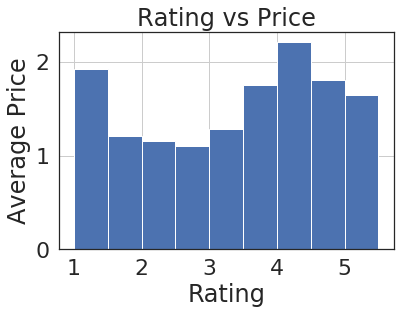

In [19]:
plt.bar(df2.index, df2['app_store_price (USD)'], align='edge', width=0.5)
plt.xlabel('Rating')
plt.ylabel('Average Price')
plt.title('Rating vs Price')
plt.grid()
plt.show()

In [20]:
#1 degree linear model
a1,b1 = np.polyfit(df2.index, df2['app_store_price (USD)'], 1)
a1, b1

(0.11393270511294695, 1.2245970843402669)

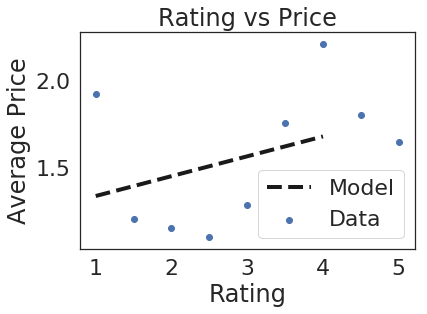

In [21]:
plt.scatter(df2.index, df2['app_store_price (USD)'], label='Data')

xs = np.arange(df2.index.min(), df2.index.max())
ys = 0.1139 * xs + 1.2246
plt.plot(xs, ys, '--k', linewidth=4, label='Model')

plt.xlabel('Rating')
plt.ylabel('Average Price')
plt.title('Rating vs Price')
plt.legend()
plt.show()

In [22]:
# Set up a helper function for checking p-values against an alpha level, and printing result
alpha = 0.05

def check_test(p_val, alpha):
    if p_val > alpha:
        print('Same distribution (fail to reject H0)')
    else:
        print('Different distribution (reject H0)')

In [23]:
# Using Whitney-Mann U test to check relation between distributions
stat, p_val = stats.mannwhitneyu(df2.index, df2['app_store_price (USD)'])
stat, p_val

(15.0, 0.013637691880792649)

In [24]:
# Check p-value of Whitney-Mann U test
check_test(p_val, alpha)

Different distribution (reject H0)


In [25]:
df['category'].value_counts()

Games                3400
Entertainment         471
Education             387
Photo & Video         325
Utilities             219
Productivity          172
Health & Fitness      159
Music                 134
Social Networking     134
Lifestyle             113
Shopping              106
Sports                101
Finance                71
Travel                 71
Weather                66
Book                   65
News                   60
Business               53
Reference              53
Food & Drink           52
Navigation             31
Medical                20
Catalogs                5
Name: category, dtype: int64

# Data Analysis & Results

Include cells that describe the steps in your data analysis.

In [26]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

# Ethics & Privacy

*Fill in your ethics & privacy discussion here*

# Conclusion & Discussion

*Fill in your discussion information here*